# Image Denoising Challenge

The goal for this challenge is to leverage your knowledge of Deep Learning to design and train a denoising model. For a given noisy image $X$, our model should learn to predict the denoised image $y$.


**Objectives**
- Visualize images
- Preprocess images for the neural network
- Fit a custom CNN for the task

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## 1. Load Data

👉 Let's download the dataset archive.
It contains RGB and Black & White images we will be using for the rest of this challenge.

In [3]:
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/paintings.zip > paintings.zip
! unzip -nq "paintings.zip" 
! rm "paintings.zip"
! ls -l

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 90.1M  100 90.1M    0     0  21.8M      0  0:00:04  0:00:04 --:--:-- 22.5M
total 3912
-rw-r--r--     1 admin  staff        0 Jun 29 09:14 README.md
-rw-r--r--     1 admin  staff  1001682 Jun 30 16:50 image_denoising-Copy1.ipynb
-rw-r--r--@    1 admin  staff   999067 Jun 30 16:51 image_denoising.ipynb
drwx------  1087 admin  staff    34784 Jun  9 15:06 paintings
drwxr-xr-x     9 admin  staff      288 Jun 30 16:49 tests


In [4]:
import glob

dataset_paths = glob.glob("./paintings/*.jpg")
dataset_paths

['./paintings/Joan_Miro_48.jpg',
 './paintings/Titian_232.jpg',
 './paintings/Amedeo_Modigliani_30.jpg',
 './paintings/Frida_Kahlo_21.jpg',
 './paintings/Marc_Chagall_59.jpg',
 './paintings/Salvador_Dali_116.jpg',
 './paintings/Vincent_van_Gogh_363.jpg',
 './paintings/Paul_Klee_47.jpg',
 './paintings/Kazimir_Malevich_106.jpg',
 './paintings/Leonardo_da_Vinci_7.jpg',
 './paintings/Francisco_Goya_199.jpg',
 './paintings/Vincent_van_Gogh_161.jpg',
 './paintings/Paul_Klee_90.jpg',
 './paintings/Paul_Cezanne_24.jpg',
 './paintings/Peter_Paul_Rubens_42.jpg',
 './paintings/Amedeo_Modigliani_184.jpg',
 './paintings/Titian_52.jpg',
 './paintings/Alfred_Sisley_165.jpg',
 './paintings/Paul_Gauguin_72.jpg',
 './paintings/Vincent_van_Gogh_767.jpg',
 './paintings/Raphael_106.jpg',
 './paintings/Pablo_Picasso_78.jpg',
 './paintings/Diego_Rivera_10.jpg',
 './paintings/Pieter_Bruegel_108.jpg',
 './paintings/Hieronymus_Bosch_25.jpg',
 './paintings/Joan_Miro_6.jpg',
 './paintings/Kazimir_Malevich_79.jpg'

❓ **Display the image at index `53` of this dataset_paths (i.e the 54-th image)**

<details>
    <summary>Hint</summary>
    Use the <code>PIL.Image.open</code> and <code>matplotlib.pyplot.imshow</code> functions.
</details>

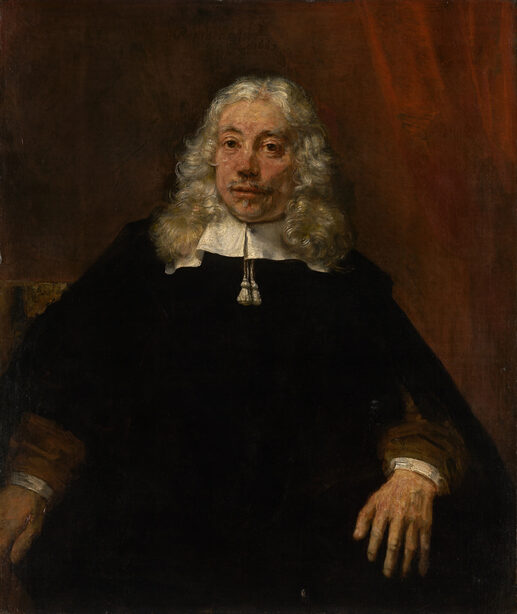

In [5]:
img_jpg = Image.open(dataset_paths[53])
img_jpg

❓ **What is the shape of the image you displayed above `img_shape`?  How many dimensions `img_dim` does it have ?**

In [6]:
img = np.array(img_jpg)

In [7]:
img_shape = img.shape

In [8]:
img_dim =  len(img_shape)

❓ **What was in the image above?**

In [9]:
img_shape = img_shape
img_dim = img_dim

# Uncomment the correct answer

is_portrait = True
#is_portrait = False

is_colored_image = True
#is_colored_image = False

In [10]:
from nbresult import ChallengeResult
result = ChallengeResult(
    'data_loading',
    img_shape=img_shape,
    img_dim=img_dim,
    is_portrait=is_portrait,
    is_colored_image=is_colored_image
)

result.write()

## 2. Processing

❓ **Store all images from the dataset folder in a list of numpy arrays called `dataset_images`**

- It can take a while
- If the dataset is too big to fit in memory, just take the first half (or quarter) of all pictures

In [11]:
dataset_images = [np.array(Image.open(dataset_paths[i])) for i in range(len(dataset_paths))]

### 2.1 Reshape, Resize, Rescale

Let's simplify our dataset and convert it to a single numpy array

❓ **First, check if that all the images in the dataset have the same number of dimensions**.
- What do you notice?
- How do you explain it? 

In [12]:
shapes = pd.DataFrame([dataset_images[i].shape for i in range(len(dataset_images))], columns=['width', 'length','colors'])

shapes

,width,length,colors
0,358,434,3.0
1,627,604,3.0
2,484,307,3.0
3,484,352,3.0
4,461,614,3.0
...,...,...,...
1080,480,641,3.0
1081,807,1020,3.0
1082,622,482,3.0
1083,458,503,3.0


In [13]:
print(f"Colors: {shapes.colors.unique()}. So there are some in B&W probably")

Colors: [ 3. nan]. So there are some in B&W probably


👉 We convert for you all black & white images into 3-colored ones by duplicating the image on three channels, so as to have only 3D arrays

In [14]:
from tqdm import tqdm

dataset_images = [x if x.ndim==3 else np.repeat(x[:,:,None], 3, axis=2) for x in tqdm(dataset_images)]

100%|██████████| 1085/1085 [00:01<00:00, 708.92it/s]


In [16]:
set([x.ndim for x in dataset_images])

{3}

❓ **What about their shape now ?**
- Do they all have the same width/heights ? If not:
- Resize the images (120 pixels height and 100 pixels width) in the dataset, using `tensorflow.image.resize` function.
- Now that they all have the same shape, store them as a numpy array `dataset_resized`.
- This array should thus be of size $(n_{images}, 120, 100, 3)$

<AxesSubplot:xlabel='length', ylabel='Count'>

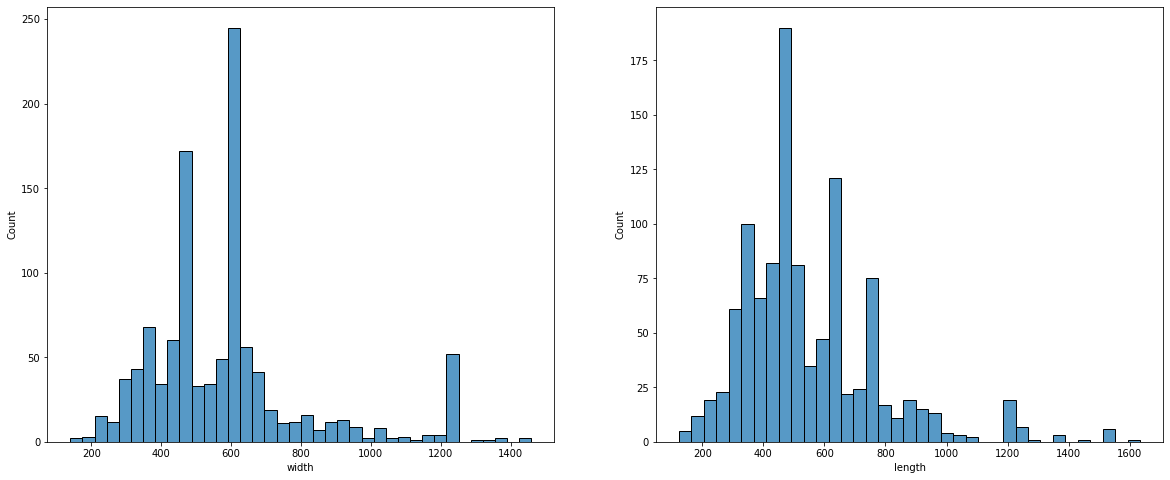

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))
sns.histplot(shapes.width, ax = ax[0])
sns.histplot(shapes.length, ax = ax[1])

In [18]:
len(dataset_images)

1085

In [19]:
from tensorflow.image import resize, resize_with_crop_or_pad

In [ ]:
#So, if I try to do it on the full set, I get below error
# ValueError: Can't convert non-rectangular Python sequence to Tensor.

# dataset_resized = resize_with_crop_or_pad(dataset_images[:3], 120,100) 
# Same error whether I use resize or this function


In [22]:
# If I do it on a single image, it works, but I already spent more than 25 minutes waiting for it... so I stopped it

dataset_resized = [resize_with_crop_or_pad(dataset_images[i], 120,100) for i in range(len(dataset_images))]

# Wow, it took 25 minutes with "resize" AND with attempted conversion to np.array,
# and ran very fast with this resize_with_crop_or_pad and WITHOUT np.array. 
# looks like np.array was the issue

In [ ]:
np.array(dataset_resized[:10])
# en revanche np.array ou np.asarray n'aboutissent pas du tout...
# sur 10 items ça met une minute 30, sur 1000 j'ai déjà passé presque une heure à l'attendre, en plusieurs fois, donc
# je vais avancer avec seulement 100 items, on dirait que c'est me max que je peux me permettre en loca
# Moins sous pression, j'irais sur Colab ou autre

In [ ]:
# did it with 100 to the end. 
# Trying with full dataset in this new notebook

dataset_resized = np.array(dataset_resized)



In [ ]:
dataset_resized.shape

❓ **Rescale the data of each image between $0$ and $1$**
- Save your resulting list as `dataset_scaled`

In [116]:
dataset_scaled = dataset_resized_small / 255

### 2.2 Create (X,y) sets

👉 Now, we'll add for you some **random noise** to our images to simulate noise (that our model will try to remove later)

In [117]:
NOISE_LEVEL = 0.2

dataset_noisy = np.clip(
    dataset_scaled + np.random.normal(
        loc=0,
        scale=NOISE_LEVEL,
        size=dataset_scaled.shape
    ).astype(np.float32),
    0,
    1
)
dataset_noisy.shape

(100, 120, 100, 3)

❓ **Plot a noisy image below to visualize the noise and compare it with the normal one**

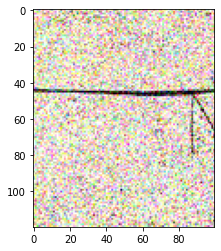

In [118]:
plt.imshow(dataset_noisy[12])
# that's noisy!

❓ **Create your `(X_train, Y_train)`, `(X_test, Y_test)` training set for your problem**

- Remember you are trying to use "noisy" pictures in order to predict the "normal" ones.
- Keeping about `20%` of randomly sampled data as test set

In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(dataset_noisy, dataset_scaled,test_size=0.2)




In [120]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((80, 120, 100, 3), (20, 120, 100, 3), (80, 120, 100, 3), (20, 120, 100, 3))

In [121]:
from nbresult import ChallengeResult
result = ChallengeResult(
    "preprocessing",
    X_train_shape = X_train.shape,
    Y_train_shape = Y_train.shape,
    X_std = X_train[:,:,:,0].std(),
    Y_std = Y_train[:,:,:,0].std(),
    first_image = Y_train[0]
)
result.write()

## 3. Convolutional Neural Network

A commonly used neural network architecture for image denoising is the __AutoEncoder__.

<img src='https://github.com/lewagon/data-images/blob/master/DL/autoencoder.png?raw=true'>

Its goal is to learn a compact representation of your data to reconstruct them as precisely as possible.  
The loss for such model must incentivize it to have __an output as close to the input as possible__.

For this challenge, __you will only be asked to code the Encoder part of the network__, since building a Decoder leverages layers architectures you are not familiar with (yet).

👉 Run this code below if you haven't managed to build your own (X,Y) training sets. This will load them as solution

```python
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/data_painting_solution.pickle > data_painting_solution.pickle

import pickle
with open("data_painting_solution.pickle", "rb") as file:
    (X_train, Y_train, X_test, Y_test) = pickle.load(file)
    
! rm data_painting_solution.pickle
```

### 3.1 Architecture

👉 Run the cell below that defines the decoder

In [122]:
import tensorflow as tf
from tensorflow.keras import layers, losses, Sequential

In [123]:
# We choose to compress images into a latent_dimension of size 6000
latent_dimensions = 6000

# We build a decoder that takes 1D-vectors of size 6000 to reconstruct images of shape (120,100,3)
decoder = Sequential(name='decoder')
decoder.add(layers.Reshape((30, 25, 8), input_dim=latent_dimensions))
decoder.add(layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding="same", activation="relu"))
decoder.add(layers.Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding="same", activation="relu"))
decoder.add(layers.Conv2D(filters=3, kernel_size=3, padding="same", activation="sigmoid"))
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 30, 25, 8)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 60, 50, 16)        1168      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 120, 100, 32)      4640      
_________________________________________________________________
conv2d (Conv2D)              (None, 120, 100, 3)       867       
Total params: 6,675
Trainable params: 6,675
Non-trainable params: 0
_________________________________________________________________


❓ **Now, build the `encoder` that plugs correctly with the decoder defined above**. Make sure that:
- The output of your `encoder` is the same shape as the input of the `decoder`
- Use a convolutional neural network architecture without transfer learning
- Keep it simple
- Print model summary

In [191]:
# CODE HERE YOUR ENCODER ARCHITECTURE AND PRINT IT'S MODEL SUMMARY

encoder = Sequential(name='encoder')
encoder.add(layers.Conv2D(6, 
          kernel_size=3, # maybe need bigger, proportionate to 120x100 size
          activation='relu', 
          padding='same', # may be needed to reconstruct the borders properly
          input_shape=(120, 100, 3)))
encoder.add(layers.MaxPooling2D(pool_size=(2,2)))
encoder.add(layers.Conv2D(3, 
          kernel_size=3,
          activation='relu'))
encoder.add(layers.MaxPooling2D(pool_size=(2,2)))

encoder.add(layers.Dense(20, activation='relu'))
encoder.add(layers.Flatten())
encoder.add(layers.Dense(6000, activation='linear'))

encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_68 (Conv2D)           (None, 120, 100, 6)       168       
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 60, 50, 6)         0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 58, 48, 3)         165       
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 29, 24, 3)         0         
_________________________________________________________________
dense_26 (Dense)             (None, 29, 24, 20)        80        
_________________________________________________________________
flatten_33 (Flatten)         (None, 13920)             0         
_________________________________________________________________
dense_27 (Dense)             (None, 6000)              8352

👉 **Test your encoder below**

In [192]:
# HERE WE BUILD THE AUTO-ENCODER (ENCODER + DECODER) FOR YOU. IT SHOULD PRINT A NICE SUMMARY
from tensorflow.keras.models import Model

x = layers.Input(shape=(120, 100, 3))
autoencoder = Model(x, decoder(encoder(x)), name="autoencoder")
autoencoder.summary()


Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 120, 100, 3)]     0         
_________________________________________________________________
encoder (Sequential)         (None, 6000)              83526413  
_________________________________________________________________
decoder (Sequential)         (None, 120, 100, 3)       6675      
Total params: 83,533,088
Trainable params: 83,533,088
Non-trainable params: 0
_________________________________________________________________


### 3.2 Training

❓ **Before training the autoencoder, evaluate your baseline score**
- We will use the mean absolute error in this challenge
- Compute the baseline score on your test set in the "stupid" case where you don't manage to de-noise anything at all.
- Store the result under `score_baseline`

In [173]:
# Supposing we predict the same noisy image that we received, 
# I take the element-wise basolute value of the element-wise difference between the X and the Y,
# And the mean thereof

score_baseline = np.abs(dataset_noisy - dataset_scaled).mean()

0.14061745672247014

❓ Now, **train your autoencoder**

- Use an appropriate loss
- Adapt the learning rate of your optimizer if convergence is too slow/fast
- Make sure your model does not overfit with appropriate control techniques

💡 You will not be judged by the computing power of your computer, you can reach decent performance in less than 5 minutes of training without GPUs.

In [194]:
autoencoder.compile(loss='mse', 
              optimizer='adam', 
              metrics=['mae'])

In [195]:
# taking a low cv to not get stuck again

from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(patience=10, restore_best_weights=True)

def evaluate_model(X_train, Y_train, train_index,val_index):
    X_train_cv, X_val = X_train[train_index], X_train[val_index]
    y_train_cv, y_val = Y_train[train_index], Y_train[val_index]
    
    model = autoencoder
    history = model.fit(X_train_cv, y_train_cv,
                    validation_data=(X_val, y_val), 
                    epochs=500,
                    batch_size=8,
                    verbose=1,
                    callbacks=[es])
    return history

# create n folds
from sklearn.model_selection import KFold
cv = 3
kf = KFold(n_splits=cv, shuffle=True)

results = []
for train_index, val_index in kf.split(X_train):
    results.append(evaluate_model(X_train, Y_train, train_index, val_index))

results

Epoch 1/500
7/7 [==============================] - 10s 1s/step - loss: 0.0826 - mae: 0.2440 - val_loss: 0.0734 - val_mae: 0.2305
Epoch 2/500
7/7 [==============================] - 8s 1s/step - loss: 0.0726 - mae: 0.2302 - val_loss: 0.0671 - val_mae: 0.2234
Epoch 3/500
7/7 [==============================] - 9s 1s/step - loss: 0.0674 - mae: 0.2243 - val_loss: 0.0557 - val_mae: 0.2024
Epoch 4/500
7/7 [==============================] - 8s 1s/step - loss: 0.0574 - mae: 0.2001 - val_loss: 0.0470 - val_mae: 0.1796
Epoch 5/500
7/7 [==============================] - 7s 967ms/step - loss: 0.0459 - mae: 0.1770 - val_loss: 0.0383 - val_mae: 0.1568
Epoch 6/500
7/7 [==============================] - 7s 1s/step - loss: 0.0365 - mae: 0.1525 - val_loss: 0.0359 - val_mae: 0.1492
Epoch 7/500
7/7 [==============================] - 7s 1s/step - loss: 0.0322 - mae: 0.1401 - val_loss: 0.0310 - val_mae: 0.1385
Epoch 8/500
7/7 [==============================] - 7s 986ms/step - loss: 0.0243 - mae: 0.1220 - val_

❓ **Plot your training and validation loss at each epoch using the cell below**

In [197]:
def plot_loss_mae(history, title=None):
    fig, ax = plt.subplots(1,2, figsize=(13,5))
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Model loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(['Train', 'Test'], loc='best')
    
    ax[1].plot(history.history['mae'])
    ax[1].plot(history.history['val_mae'])
    ax[1].set_title('Model MAE')
    ax[1].set_ylabel('MAE')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Test'], loc='best')
    if title:
        fig.suptitle(title)

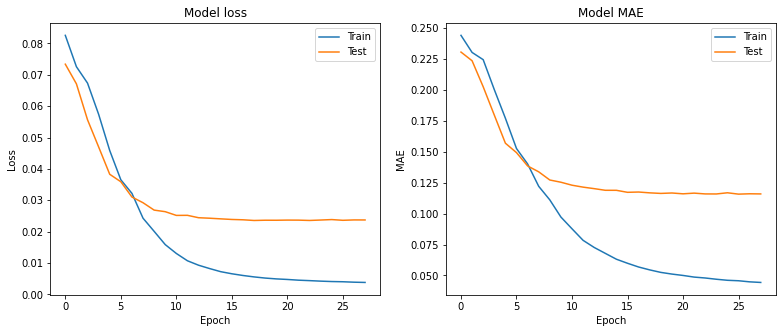

In [198]:
# Plot below your train/val loss history
        
plot_loss_mae (results[0])

# Run also this code to save figure as jpg in path below (it's your job to ensure it works)
fig = plt.gcf()
plt.savefig("tests/history.png")

# The network does learn despite using only 100 datapoints
# There remains some overfitting, which I may try to correct with approaches like stride, 
# or maybe even dropout layers or regularizers, not sure how they work with CNN

❓ **Evaluate your performances on test set**
- Compute your de-noised test set `Y_pred` 
- Store your test score as `score_test`
- Plot a de-noised image from your test set and compare it with the original and noisy one using the cell below

In [201]:
Y_pred = autoencoder.predict(X_test)

score_test = autoencoder.evaluate(X_test, Y_test)
print(f"{autoencoder.metrics_names}: {score_test}")

1/1 [==============================] - 0s 220ms/step - loss: 0.0296 - mae: 0.1243
['loss', 'mae']: [0.029597172513604164, 0.12429920583963394]


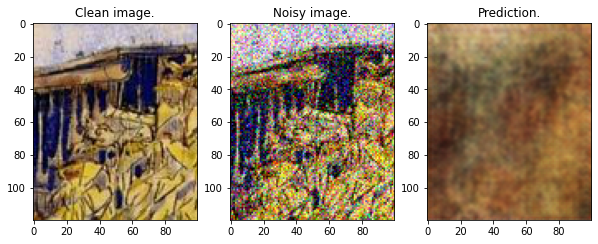

In [206]:
# RUN THIS CELL TO CHECK YOUR RESULTS
idx = 18

fig, axs = plt.subplots(1,3, figsize=(10,5))
axs[0].imshow(Y_test[idx])
axs[0].set_title("Clean image.")

axs[1].imshow(X_test[idx])
axs[1].set_title("Noisy image.")

axs[2].imshow(Y_pred[idx])
axs[2].set_title("Prediction.")

# Run this to save your results for correction
plt.savefig('tests/image_denoised.png')

🧪 **Send your results below**

In [207]:
from nbresult import ChallengeResult

result = ChallengeResult(
    "network",
    input_shape = list(encoder.input.shape),
    output_shape = list(encoder.output.shape),
    layer_names = [layer.name for layer in encoder.layers],
    trainable_params = sum([tf.size(w_matrix).numpy() for w_matrix in encoder.trainable_variables]),
    score_baseline = score_baseline,
    score_test = score_test,
)
result.write()

NameError: name 'score_baseline' is not defined